# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [5]:
cities

['jamestown',
 'rikitea',
 'oktyabrskoye',
 'shimoda',
 'isangel',
 'tasiilaq',
 'hobart',
 'kapaa',
 'vredendal',
 'punta arenas',
 'albany',
 'port-gentil',
 'lasa',
 'saskylakh',
 'saleaula',
 'pacific grove',
 'puerto ayora',
 'upernavik',
 'tiksi',
 'ahipara',
 'filottrano',
 'rosario do sul',
 'khorramshahr',
 'khatanga',
 'barrow',
 'esperance',
 'gashua',
 'san policarpo',
 'talnakh',
 'yumen',
 'clyde river',
 'ushuaia',
 'mayo',
 'ixtapa',
 'kalabo',
 'naftah',
 'cape town',
 'boca do acre',
 'teruel',
 'port elizabeth',
 'finschhafen',
 'ambon',
 'vaini',
 'beloha',
 'tieli',
 'seoul',
 'waddan',
 'tumannyy',
 'leningradskiy',
 'bredasdorp',
 'price',
 'talakan',
 'kirakira',
 'thompson',
 'hermanus',
 'ponta do sol',
 'tuktoyaktuk',
 'bejar',
 'araouane',
 'christchurch',
 'bluff',
 'mataura',
 'busselton',
 'saint anthony',
 'acajutla',
 'beisfjord',
 'port alfred',
 'marcona',
 'narsaq',
 'odweyne',
 'acarau',
 'butaritari',
 'naze',
 'saint-francois',
 'georgetown',
 'sa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Get weather data
units = "metric"
resp = dict()

for city in cities:
    print(city)
    resp[city] = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units={units}").json()
    

jamestown
rikitea
oktyabrskoye
shimoda
isangel
tasiilaq
hobart
kapaa
vredendal
punta arenas
albany
port-gentil
lasa
saskylakh
saleaula
pacific grove
puerto ayora
upernavik
tiksi
ahipara
filottrano
rosario do sul
khorramshahr
khatanga
barrow
esperance
gashua
san policarpo
talnakh
yumen
clyde river
ushuaia
mayo
ixtapa
kalabo
naftah
cape town
boca do acre
teruel
port elizabeth
finschhafen
ambon
vaini
beloha
tieli
seoul
waddan
tumannyy
leningradskiy
bredasdorp
price
talakan
kirakira
thompson
hermanus
ponta do sol
tuktoyaktuk
bejar
araouane
christchurch
bluff
mataura
busselton
saint anthony
acajutla
beisfjord
port alfred
marcona
narsaq
odweyne
acarau
butaritari
naze
saint-francois
georgetown
saint-joseph
sarkand
qasigiannguit
hilo
avarua
vila franca do campo
qaanaaq
cabo san lucas
bam
inongo
bandar-e lengeh
acapulco
le port
ribeira grande
pochutla
provideniya
oranjestad
buraydah
madison heights
airai
kalianget
kavaratti
senneterre
atuona
albury
yellowknife
kaitangata
benguela
svetlogorsk
hi

In [11]:
resp

{'jamestown': {'coord': {'lon': -79.24, 'lat': 42.1},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 18.65,
   'feels_like': 16.53,
   'temp_min': 18,
   'temp_max': 18.89,
   'pressure': 1015,
   'humidity': 72},
  'visibility': 10000,
  'wind': {'speed': 4.6, 'deg': 200},
  'clouds': {'all': 20},
  'dt': 1599477874,
  'sys': {'type': 1,
   'id': 4588,
   'country': 'US',
   'sunrise': 1599475761,
   'sunset': 1599522038},
  'timezone': -14400,
  'id': 5122534,
  'name': 'Jamestown',
  'cod': 200},
 'rikitea': {'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 22.73,
   'feels_like': 23.11,
   'temp_min': 22.73,
   'temp_max': 22.73,
   'pressure': 1020,
   'humidity': 88,
   'sea_level': 1020,
   'grnd_level': 1017},
  'visibility': 10000,
  'wind': {'speed

In [19]:
resp['jamestown']


['jamestown', 42.1, -79.24, 18.89, 72, 20, 4.6, 'US', 1599477874]

In [31]:
df = dict()
for d in resp:
    if type(resp[d]) == list:
        continue
    
    if resp[d]['cod'] == '404':
        continue
    df[d] = [resp[d]['coord']['lat'],
            resp[d]['coord']['lon'],
            resp[d]['main']['temp_max'],
            resp[d]['main']['humidity'],
            resp[d]['clouds']['all'],
            resp[d]['wind']['speed'],
            resp[d]['sys']['country'],
            resp[d]['dt']
            ]
df

{'jamestown': [42.1, -79.24, 18.33, 77, 90, 5.1, 'US', 1599481582],
 'rikitea': [-23.12, -134.97, 22.72, 88, 19, 4.74, 'PF', 1599481614],
 'oktyabrskoye': [43.06, 44.74, 25, 65, 95, 2, 'RU', 1599481614],
 'shimoda': [34.67, 138.95, 22.78, 92, 93, 4.51, 'JP', 1599481614],
 'isangel': [-19.55, 169.27, 21.95, 83, 92, 5.87, 'VU', 1599481614],
 'tasiilaq': [65.61, -37.64, 3, 100, 3, 1.5, 'GL', 1599481615],
 'hobart': [-42.88, 147.33, 16.67, 58, 100, 4.1, 'AU', 1599481376],
 'kapaa': [22.08, -159.32, 27, 78, 90, 5.7, 'US', 1599481397],
 'vredendal': [-31.67, 18.5, 28, 25, 0, 4.63, 'ZA', 1599481615],
 'punta arenas': [-53.15, -70.92, 3, 93, 99, 3.6, 'CL', 1599481411],
 'albany': [42.6, -73.97, 18.33, 71, 6, 4.14, 'US', 1599481384],
 'port-gentil': [-0.72, 8.78, 29, 66, 40, 5.22, 'GA', 1599481616],
 'lasa': [46.62, 10.7, 17.22, 81, 40, 3.6, 'IT', 1599481616],
 'saskylakh': [71.92, 114.08, 7.4, 65, 42, 3.7, 'RU', 1599481617],
 'pacific grove': [36.62, -121.92, 21, 60, 1, 2.08, 'US', 1599481531]

In [36]:
cols = ['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']      
df = pd.DataFrame(df, index=cols).T
df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
jamestown,42.1,-79.24,18.33,77,90,5.1,US,1599481582
rikitea,-23.12,-134.97,22.72,88,19,4.74,PF,1599481614
oktyabrskoye,43.06,44.74,25,65,95,2,RU,1599481614
shimoda,34.67,138.95,22.78,92,93,4.51,JP,1599481614
isangel,-19.55,169.27,21.95,83,92,5.87,VU,1599481614
...,...,...,...,...,...,...,...,...
capreol,46.71,-80.92,18.33,100,90,6.2,CA,1599481825
frontera,26.93,-101.45,22.22,87,100,0.25,MX,1599481826
tiznit,29.58,-9.5,36.35,16,0,4.45,MA,1599481827
harqalah,36.03,10.51,30,42,20,4.6,TN,1599481827


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,576.00,576.00,576.0,576,576,576.0,576,576
unique,556.00,569.00,327.0,92,89,280.0,118,247
top,65.58,70.83,26.0,83,0,2.1,RU,1599481628
freq,2.00,2.00,14.0,27,84,27.0,70,5


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

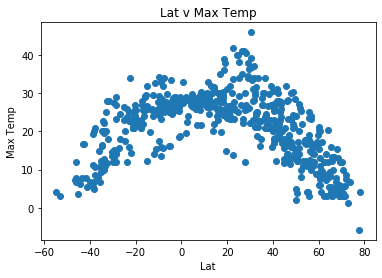

In [88]:
plt.scatter(df.Lat, df["Max Temp"])
plt.title("Lat v Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig("LatTemp.png")

## Latitude vs. Humidity Plot

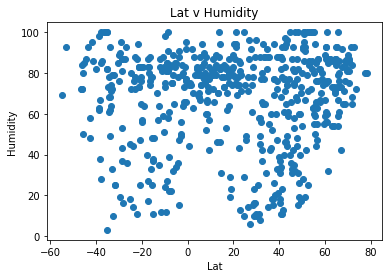

In [89]:
plt.scatter(df.Lat, df.Humidity)
plt.title("Lat v Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.savefig("LatHumid.png")

## Latitude vs. Cloudiness Plot

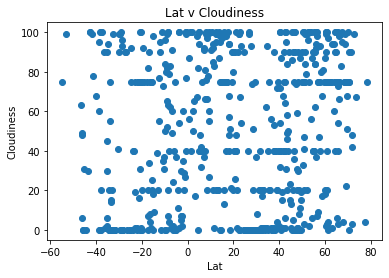

In [90]:
plt.scatter(df.Lat, df.Cloudiness)
plt.title("Lat v Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.savefig("LatCloud.png")

## Latitude vs. Wind Speed Plot

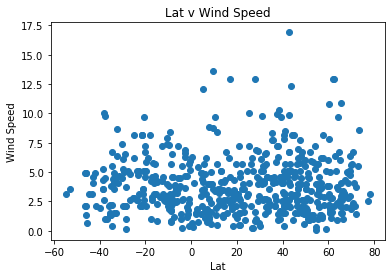

In [91]:
plt.scatter(df.Lat, df["Wind Speed"])
plt.title("Lat v Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.savefig("LatWind.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg_plot(x,y):
    lin = linregress(x.astype(float), y.astype(float))

    plt.scatter(x, y)
    #print([x.min(), x.min()*lin[0] + lin[1], x.max(), x.max()*lin[0] + lin[1]])
    plt.plot([x.min(),x.max()], [x.min()*lin[0] + lin[1], x.max()*lin[0] + lin[1]], color='r')
    plt.text(x.min(),y.max()-1,f"y={lin[0]}x + {lin[1]}", color='r')
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

[0.52, 34.072479609386875, 78.22, 7.30033903922401]


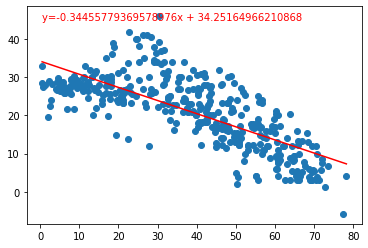

In [78]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl["Max Temp"])


The r-squared is: 0.8271188905041935


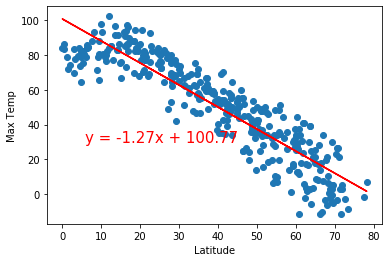

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

[-54.8, 6.7769640954448995, -0.6, 29.31204015916649]


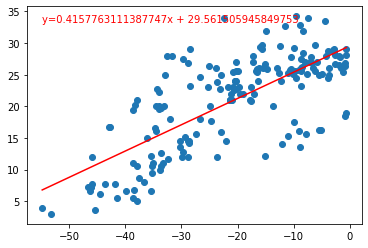

In [79]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl["Max Temp"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

[0.52, 66.13268623288499, 78.22, 70.09404198349424]


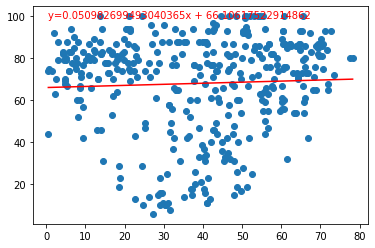

In [80]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl.Humidity)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

[-54.8, 71.14651143452664, -0.6, 63.97335024757769]


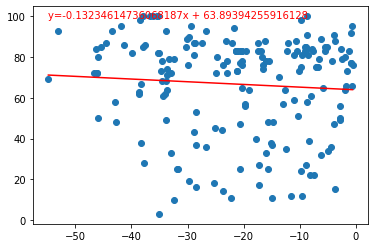

In [81]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl.Humidity)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

[0.52, 49.10416608718351, 78.22, 54.66709442029021]


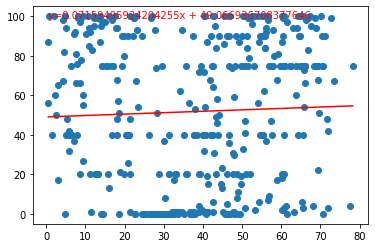

In [83]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl.Cloudiness)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

[-54.8, 41.045299129774044, -0.6, 46.76511219653915]


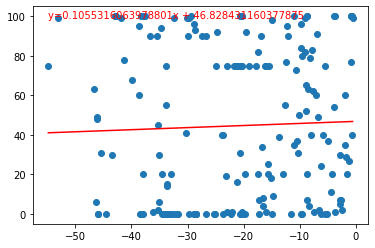

In [84]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl.Cloudiness)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

[0.52, 3.6948748526726383, 78.22, 4.061652987857919]


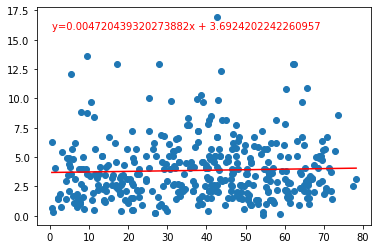

In [85]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl["Wind Speed"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

[-54.8, 3.9630699355502315, -0.6, 3.8858812484596066]


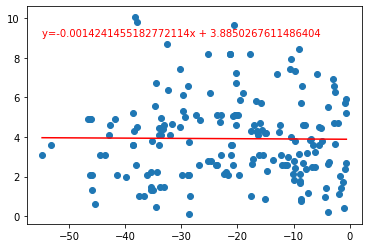

In [86]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl["Wind Speed"])